In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_file = "data/mouse_drug_data.csv"
clinical_file = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse = pd.read_csv(mouse_file)
clinical = pd.read_csv(clinical_file)

# Combine the data into a single dataset
pyma = mouse.merge(clinical, on="Mouse ID", how="outer")


# Display the data table for preview
pyma.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
#drug_group = pyma.groupby(by=["Drug", "Timepoint"], as_index=False)
mean_tumor = pyma.groupby(["Drug", "Timepoint"]).mean()["Tumor Volume (mm3)"] 

# Convert to DataFrame
mean_tumor = pd.DataFrame(mean_tumor)
mean_tumor.reset_index(inplace=True)

# Preview DataFrame
mean_tumor.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_tumor = pyma.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"]

# Convert to DataFrame
sem_tumor = pd.DataFrame(sem_tumor)
sem_tumor.reset_index(inplace=True)

# Preview DataFrame
sem_tumor.head()



,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
mean_tumor = mean_tumor.pivot(index="Timepoint", columns = "Drug", values = "Tumor Volume (mm3)")
mean_tumor.reset_index(inplace=True)

# Preview that Reformatting worked
mean_tumor

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
2,10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
3,15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
4,20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
5,25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
6,30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
7,35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
8,40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692
9,45,36.236114,64.132421,65.755562,70.662958,69.265506,68.084082,66.258529,34.955595,68.438310,65.960888


In [5]:
# Minor Data Munging to Re-Format the Data Frames
sem_tumor = sem_tumor.pivot(index="Timepoint", columns = "Drug", values = "Tumor Volume (mm3)")
sem_tumor.reset_index(inplace=True)

# Preview that Reformatting worked
sem_tumor

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
2,10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
3,15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
4,20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
5,25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
6,30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
7,35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
8,40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515
9,45,1.223977,0.902358,1.144427,1.453186,1.416363,1.351726,1.888586,1.226805,1.576556,1.003576


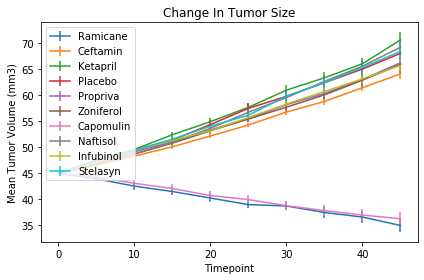

In [6]:
alldrugs = {'Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril','Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'}

# Generate the Plot (with Error Bars)
for drug in alldrugs:
    plt.errorbar(mean_tumor["Timepoint"], mean_tumor[drug], label=drug, yerr = sem_tumor[drug])

plt.legend(loc="upper left")
plt.title("Change In Tumor Size")
plt.xlabel("Timepoint")
plt.ylabel("Mean Tumor Volume (mm3)")
plt.tight_layout()

#save plot
plt.savefig("mean_tumor.png")

#show plot
plt.show()


In [7]:
#for drug in alldrugs:
#    plt.errorbar(sem_tumor["Timepoint"], sem_tumor[drug])

#sem_tumor_plt = plt.show()
#print(sem_tumor_plt)


## Metastatic Response to Treatment

In [8]:
sem_tumor.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
2,10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
3,15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
4,20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


In [9]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met = pyma.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"]

# Convert to DataFrame
mean_met = pd.DataFrame(mean_met)
mean_met.reset_index(inplace=True)

# Preview DataFrame
mean_met.head()



,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [10]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_met = pyma.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"]

# Convert to DataFrame
sem_met = pd.DataFrame(sem_met)
sem_met.reset_index(inplace=True)

# Preview DataFrame
sem_met.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [11]:
# Minor Data Munging to Re-Format the Data Frames
mean_met = mean_met.pivot(index="Timepoint", columns = "Drug", values = "Metastatic Sites")

mean_met.reset_index(inplace=True)

# Preview that Reformatting worked
mean_met.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
2,10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
3,15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
4,20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [12]:
# Minor Data Munging to Re-Format the Data Frames
sem_met = sem_met.pivot(index="Timepoint", columns = "Drug", values = "Metastatic Sites")

sem_met.reset_index(inplace=True)

# Preview that Reformatting worked
sem_met.head()



Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
2,10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
3,15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
4,20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


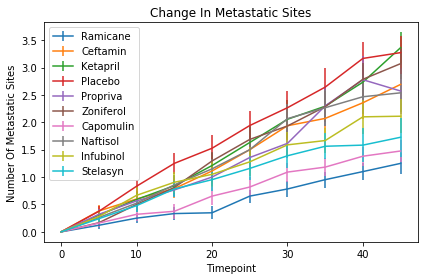

In [13]:
# Generate the Plot (with Error Bars)
for drug in alldrugs:
    plt.errorbar(mean_met["Timepoint"], mean_met[drug], label=drug, yerr = sem_met[drug])

plt.legend(loc="upper left")
plt.title("Change In Metastatic Sites")
plt.xlabel("Timepoint")
plt.ylabel("Number Of Metastatic Sites")
plt.tight_layout()

#save plot
plt.savefig("mean_met.png")

#show plot
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [14]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
count_mouse = pyma.groupby(["Drug", "Timepoint"]).count()["Mouse ID"]

# Convert to DataFrame
count_mouse = pd.DataFrame(count_mouse)
count_mouse.reset_index(inplace=True)

# Preview DataFrame
count_mouse.head()


,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [15]:
# Minor Data Munging to Re-Format the Data Frames
count_mouse = count_mouse.pivot(index="Timepoint", columns = "Drug", values = "Mouse ID")

count_mouse.reset_index(inplace=True)

# Preview that Reformatting worked
count_mouse.head()


Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,25,25,25,25,25,25,26,25,26,25
1,5,25,21,25,23,23,24,25,25,25,24
2,10,25,20,21,22,21,24,23,24,23,22
3,15,24,19,21,19,21,20,17,24,23,21
4,20,23,18,20,19,20,19,17,23,21,17


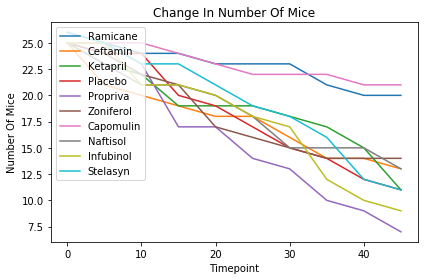

In [16]:
# Generate the Plot (with Error Bars)
for drug in alldrugs:
    plt.plot(count_mouse["Timepoint"], count_mouse[drug], label=drug)

plt.legend(loc="upper left")
plt.title("Change In Number Of Mice")
plt.xlabel("Timepoint")
plt.ylabel("Number Of Mice")
plt.tight_layout()

#save plot
plt.savefig("mouse_count.png")

#show plot
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [17]:
# Calculate the percent changes for each drug
mean_tumor

# Display the data to confirm
pchange = mean_tumor.pct_change()

pchange = pchange.drop([0,1,2,3,4,5,6,7,8])

pchange = pchange.drop(columns="Timepoint")

pchange


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
9,-0.019533,0.043348,0.041048,0.06954,0.055864,0.046599,0.050963,-0.044252,0.047156,0.048385


In [18]:
#pclist = pchange.values.tolist()

#pclist

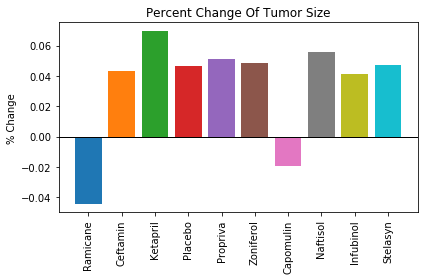

In [19]:
for drug in alldrugs:
    plt.bar(drug,pchange[drug])

#    for drug in alldrugs:
#    plt.plot(count_mouse["Timepoint"], count_mouse[drug], label=drug)

#plt.legend(loc="upper middle")
plt.title("Percent Change Of Tumor Size")
plt.ylabel("% Change")
plt.xticks(rotation="vertical")
plt.axhline(linewidth=1, color="black")
plt.tight_layout()

# Save the Figure

plt.savefig("percent_change.png")

#Show figure
plt.show()

![Metastatic Spread During Treatment](../Images/change.png)